In [70]:
import pandas as pd
import numpy as np

%matplotlib inline  


In [3]:
df = pd.read_csv("matched_data.csv")

In [4]:
#df[['Age','H6','H6.1']]

In [5]:
clean_df = df[:][df['H6'] != 'DK']

In [6]:
clean_df['H6'] = pd.to_numeric(clean_df['H6'])

In [7]:
oldwidth=pd.get_option('display.max_colwidth') # show the full width of SA2 column
pd.set_option('display.max_colwidth', -1)

# Analysis of pre-survey interests

### Here we will examine the interest in humanitarian issues versus CS skill development

In [8]:
SA1_answers = df['SA1.'].dropna() # grab the non-empty SA1 answers
print("Total non-empty answers:", len(SA1_answers))
print("How many mentioned a word related to helping:", sum(SA1_answers.str.contains('help|society|meaning|giving|good|give')))

Total non-empty answers: 34
How many mentioned a word related to helping: 12


How many mentioned skill development?

In [24]:
print("How many mentioned a word related to skill development:", sum(SA1_answers.str.contains('skill|learn|improve|gain')))

How many mentioned a word related to skill development: 14


# Analysis by Origin

**Pre-survey results** recreation of graph by Lori

(0, 5.5)

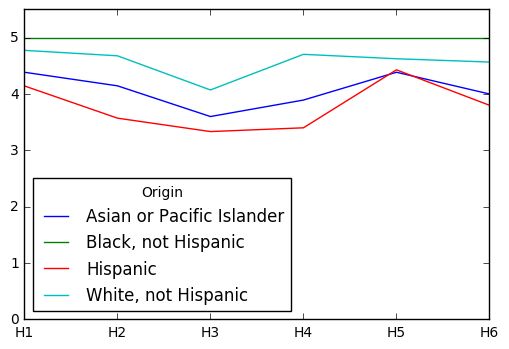

In [98]:
df_all = pd.read_excel("Hopper 2016 - analysis.xls")
#print(list(df_all))
pre_survey_race = df_all[['Origin','H1','H2','H3','H4','H5','H6']]
pre_survey_race = pre_survey_race.replace('DK',np.nan)
#pre_survey_race
means = pre_survey_race.groupby('Origin').mean()
tp = means.transpose()
ax = tp.plot.line()
ax.set_ylim([0,5.5])


**Post-survey results** recreation of graph by Lori

,H1.1,H2.1,H3.1,H4.1,H5.1,H6.1
Origin,,,,,,
Asian or Pacific Islander,4.529412,4.393939,4.172414,4.285714,4.375000,4.09375
"Black, not Hispanic",5.000000,5.000000,5.000000,5.000000,5.000000,5.00000
Hispanic,4.800000,4.800000,4.250000,4.500000,4.666667,4.20000
"White, not Hispanic",4.526316,4.315789,4.176471,4.176471,4.600000,4.50000


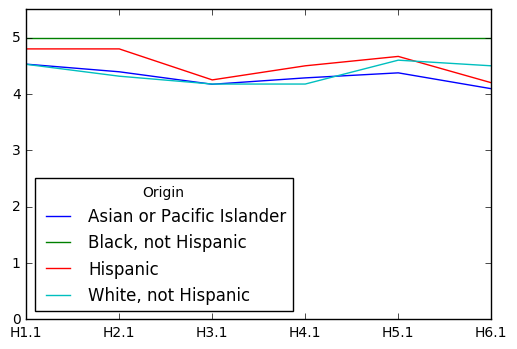

In [103]:
#print(list(df_all))
post_survey_race = df_all[['Origin','H1.1','H2.1','H3.1','H4.1','H5.1','H6.1']]
post_survey_race = post_survey_race.replace('DK',np.nan)
#pre_survey_racea
means = post_survey_race.groupby('Origin').mean()
means = means.replace(np.nan,5.0) # Handle the one NaN entry
tp = means.transpose()
ax = tp.plot.line()
ax.set_ylim([0,5.5])
means

In [107]:
#post_survey_race

**Here are the comments from those with negative H6 changes**

In [51]:
clean_df['SA2'][clean_df['H6.1']-clean_df['H6'] < 0]

7     Projects take a lot of work, try something sma...
13                                                  NaN
23              I learned how to use HEAT for OpenStack
26                                                  NaN
31                                                  NaN
35       If you don’t konw a lot you can still do a lot
36                                                  NaN
41              Collaboration makes for better projects
45                                                  NaN
46    To make sure you have good documentation on an...
Name: SA2, dtype: object

**Here are the comments fromm those with negative H5 changes**

In [12]:
clean_df['SA2'][clean_df['H5.1']-clean_df['H5'] < 0]

1     Collaboratively/breaking up tasks and asking for help is important.                                                              
5     That most people, including professors and professionals are as lost as me sometimes                                             
22    Learned new terms, got introduction of a few new platforms which I’ll study now on my own. Good mentors and open stack organizers
23    I learned how to use HEAT for OpenStack                                                                                          
26    NaN                                                                                                                              
41    Collaboration makes for better projects                                                                                          
45    NaN                                                                                                                              
Name: SA2, dtype: object

In [13]:
pd.set_option('display.max_colwidth', oldwidth) # set the display width back to the default value

In [35]:
post_survey_diff_country = clean_df[['Country','H1Diff','H2Diff','H3Diff','H4Diff','H5Diff','H6Diff']]

In [45]:
post_survey_diff_country = post_survey_diff_country.replace('#VALUE!', np.nan)

In [46]:
clean_post_survey_diff = post_survey_diff_country.apply(pd.to_numeric, errors='ignore')

**Here are the counts of attendees by country**

In [47]:
clean_post_survey_diff.groupby('Country').count()

,H1Diff,H2Diff,H3Diff,H4Diff,H5Diff,H6Diff
Country,,,,,,
Bangladesh,1,1,1,1,1,1
Brazil,1,1,1,1,1,1
Canada,1,1,1,1,1,1
China,3,3,3,3,3,3
Germany,2,2,2,2,2,2
Hong Kong,1,1,1,1,1,1
India,13,12,9,10,12,12
New Zealand,1,1,1,1,1,1
Nigeria,1,0,0,0,1,1


**Average change by country**

Here we calculate the average change from pre-to-post for each country. The countries with the largest number of attendees are India, USA and arguable China. I note that all categories for USA and China had an average negative change. For India, the changes were neutral or positive except for H6.

In [48]:
clean_post_survey_diff.groupby('Country').mean()

,H1Diff,H2Diff,H3Diff,H4Diff,H5Diff,H6Diff
Country,,,,,,
Bangladesh,1.000000,1.000000,2.0000,2.000000,1.000000,2.000000
Brazil,-1.000000,-1.000000,-1.0000,-1.000000,0.000000,-1.000000
Canada,-1.000000,-1.000000,0.0000,0.000000,0.000000,-1.000000
China,-0.666667,0.000000,0.0000,0.000000,-0.333333,-0.333333
Germany,0.000000,0.000000,0.5000,0.000000,-0.500000,1.500000
Hong Kong,1.000000,1.000000,0.0000,1.000000,1.000000,1.000000
India,0.000000,0.250000,0.0000,0.200000,0.000000,-0.166667
New Zealand,0.000000,0.000000,0.0000,-5.000000,-5.000000,-4.000000
Nigeria,0.000000,NaN,NaN,NaN,0.000000,0.000000
